# Домашнее задание "Центральная предельная теорема и статистика".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [127]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [128]:
locc = 0
rv = stats.pareto(b=2.62,loc=locc, scale=1)
sample = rv.rvs(size=1000)

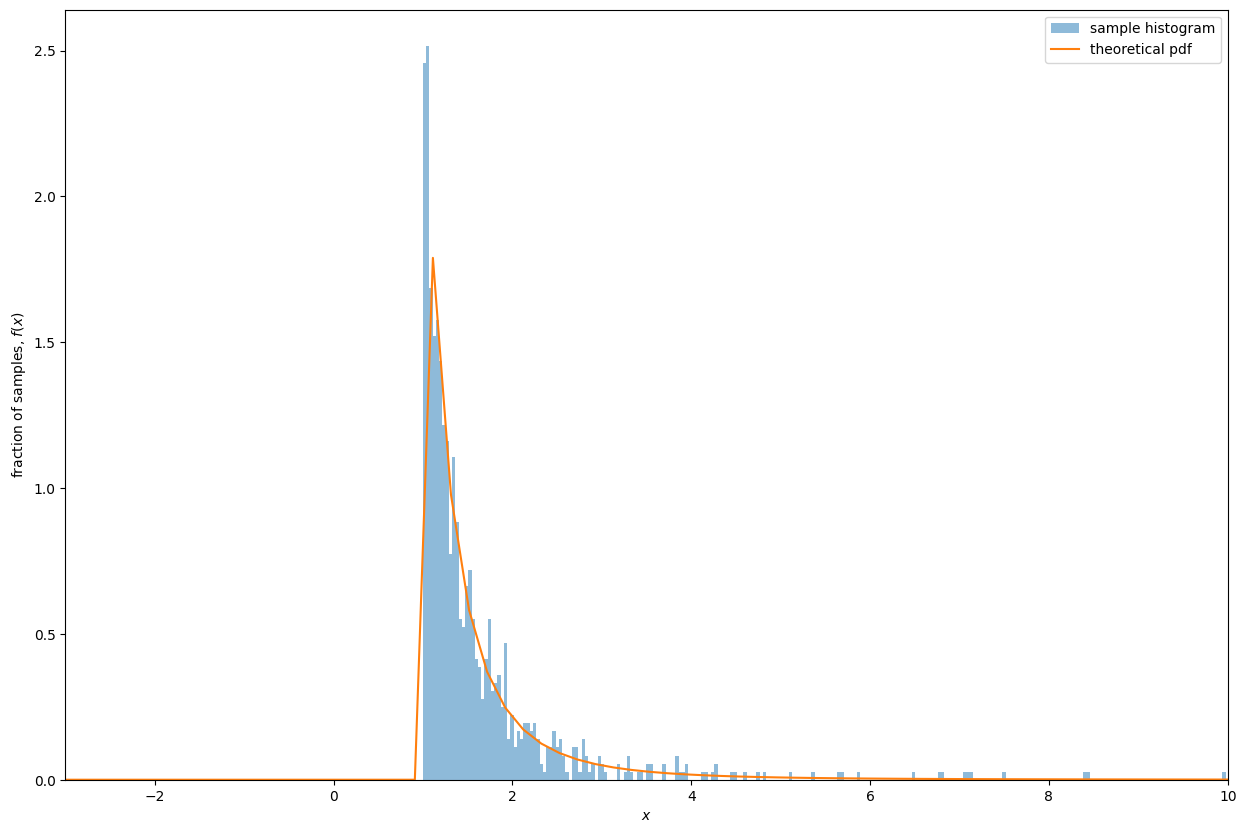

In [129]:
x = np.linspace(-10,10,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=1000, label='sample histogram', alpha=0.5)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.xlim(locc-3, locc+10)
plt.show()

In [130]:
n1 = 2                # Размеры выборок 
n2 = n1**n1
n3 = n2**n2

a1 = np.array([])     # Массивы для сохранения средних по выборкам
a2 = np.array([])
a3 = np.array([])

samples_count = 1000  # Количество повторов генерации

for number in range(samples_count): 
    sample1 = rv.rvs(size=n1)               # На каждом цикле генерируем выборки указанных размеров
    sample2 = rv.rvs(size=n2)
    sample3 = rv.rvs(size=n3)
    a1 = np.append(a1, sample1.mean())
    a2 = np.append(a2, sample2.mean())
    a3 = np.append(a3, sample3.mean())

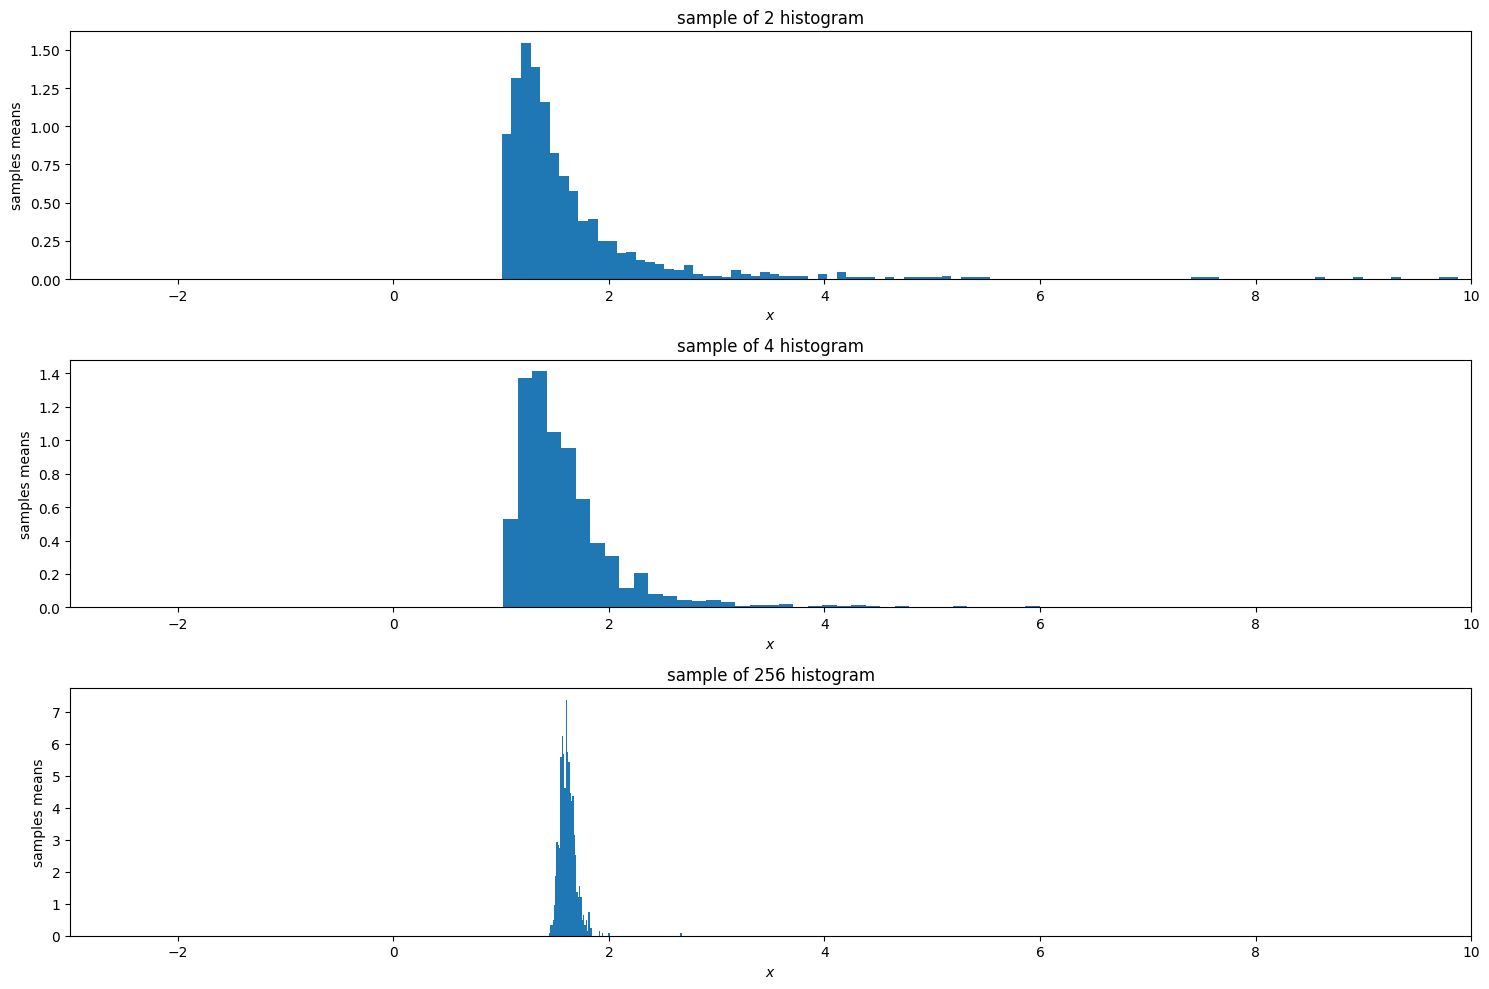

In [131]:
ns = (n for n in [n1,n2,n3]) # делаем генератор только для лейблев

fig, axs = plt.subplots(3, 1)

for i,value in enumerate([a1,a2,a3]):
    ax = axs[i]
    ax.hist(value, bins=100,density=True, label=label_1)
    ax.set_title('sample of ' + str(next(ns)) + ' histogram')

        
for ax in axs.flat:
    ax.set_ylabel('samples means')

    ax.set_xlabel('$x$')
    ax.set_xlim(locc-3, locc+10)
    
fig.tight_layout()

plt.show()


Так ну возможно выбор распределния был не лучшим, я не совсем в нем разбираюсь и не понимаю почему стандартизированном распределении на графике все равно мат ожидание сдвигается вправо, однако все равно видно, что при прогоне большого количество случайных выборок распределение средних этих выборок очень близко к нормальному и тем меньше дисперсия, чем большую выборку мы рассматриваем.